# Data Preparation

This notebook demonstrates how to load the **Financial Phrasebank** dataset and create hierarchically nested splits for the sentiment analysis mini-challenge.

In [1]:
import sys
import os

# Add src to path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from data_loader import load_and_split_data
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data and Create Splits

We use the `load_and_split_data` function from `src/data_loader.py`.

In [2]:
splits = load_and_split_data()

print("Available splits:", splits.keys())

Loading dataset: takala/financial_phrasebank (sentences_allagree)


Using the latest cached version of the dataset since takala/financial_phrasebank couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'sentences_allagree' at /Users/stefanbinkert/.cache/huggingface/datasets/takala___financial_phrasebank/sentences_allagree/1.0.0/550bde12e6c30e2674da973a55f57edde5181d53f5a5a34c1531c53f93b7e141 (last modified on Tue Nov 25 21:04:35 2025).


Total samples: 2264
Test size: 453
Validation size: 182
Training pool size: 1629
Created split 'train_100': 100 samples
Created split 'unlabeled_100': 1529 samples
Created split 'train_250': 250 samples
Created split 'unlabeled_250': 1379 samples
Created split 'train_500': 500 samples
Created split 'unlabeled_500': 1129 samples
Created split 'train_1000': 1000 samples
Created split 'unlabeled_1000': 629 samples
Available splits: dict_keys(['test', 'val', 'train_100', 'unlabeled_100', 'train_250', 'unlabeled_250', 'train_500', 'unlabeled_500', 'train_1000', 'unlabeled_1000'])


## Verify Hierarchical Property

Ensure that `train_100` is a subset of `train_250`, which is a subset of `train_500`, and so on.

In [3]:
train_100 = splits['train_100']
train_250 = splits['train_250']
train_500 = splits['train_500']
train_1000 = splits['train_1000']

# Check if indices of smaller sets are contained in larger sets
assert set(train_100.index).issubset(set(train_250.index))
assert set(train_250.index).issubset(set(train_500.index))
assert set(train_500.index).issubset(set(train_1000.index))

print("Hierarchical property verified!")

Hierarchical property verified!


## Visualize Class Distribution

Let's look at the distribution of labels (0: negative, 1: neutral, 2: positive) in the training sets.

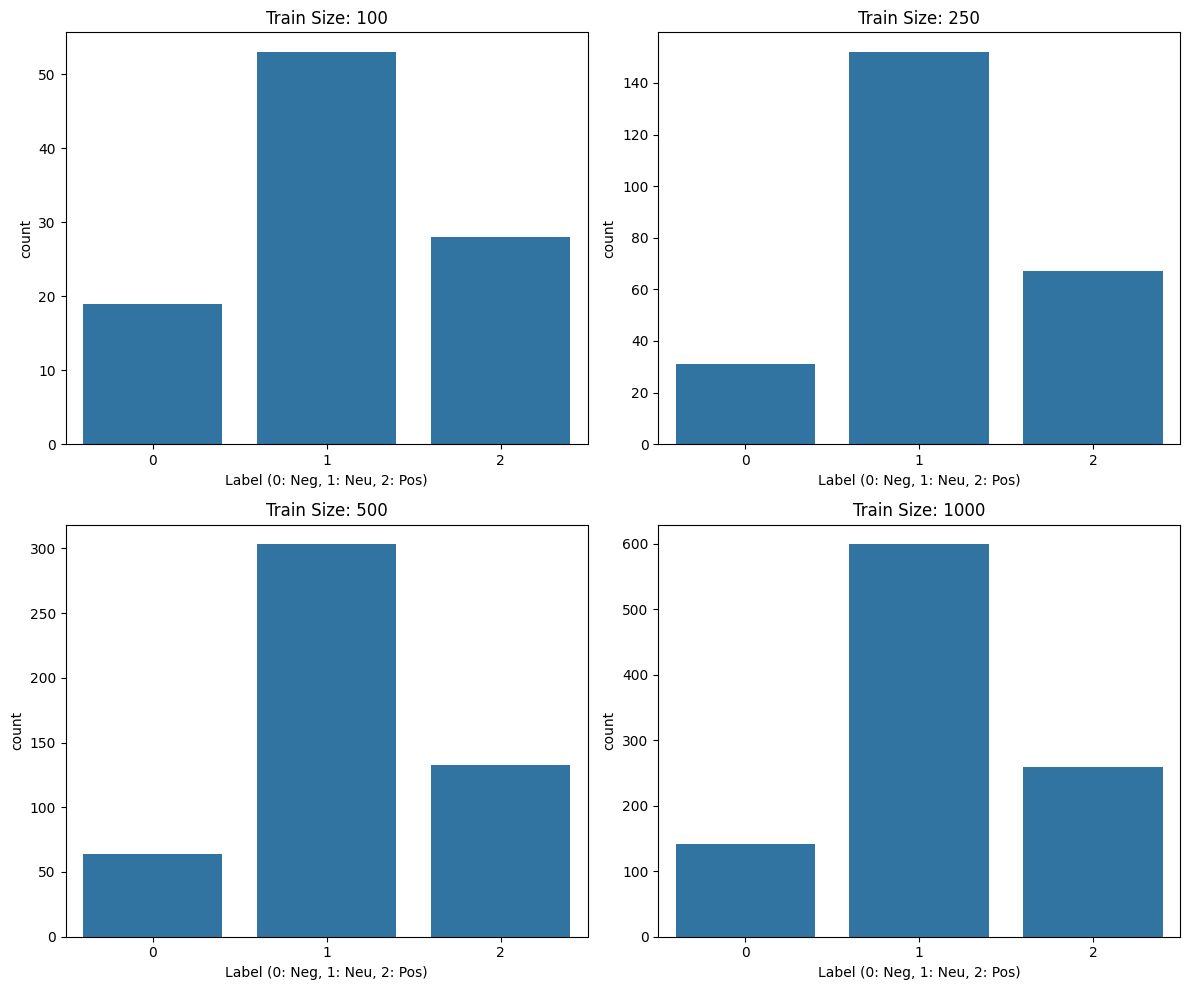

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, size in enumerate([100, 250, 500, 1000]):
    df = splits[f'train_{size}']
    sns.countplot(x='label', data=df, ax=axes[i])
    axes[i].set_title(f'Train Size: {size}')
    axes[i].set_xlabel('Label (0: Neg, 1: Neu, 2: Pos)')

plt.tight_layout()
plt.show()